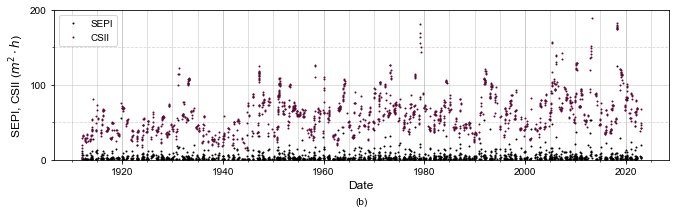

<function matplotlib.pyplot.clf()>

In [28]:
# Plots a comparison of SEPI versus CSII for one tidal gauge
# (Choose title guage by chaning the i value in the loop)

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import shutil
import numpy as np
from scipy.stats import linregress
from plot_config import colors, font_family, font_size, label_size, label_list
from dateutil import parser
import csv
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = font_family

# Make plots for all stations with a single delta value
delta = 0.3
delta_str = str(delta).replace('.', '-')

# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 280
fig_height_mm = 70

fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch

# Create the figure with the specified size in millimeters
plt.figure(figsize=(fig_width_inch, fig_height_inch))


# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder_path = os.path.join(parent_dir, "Final_Storm_Results")

# Create the path to the folder within the current directory
filenames = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, f) for f in filenames]

# Get a list of all CSV files in the directory
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
file_names = sorted(file_names)

now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
directoryName = os.path.abspath(f"Compare_Plots_delta_{delta_str}")

if not os.path.exists(directoryName):
    os.makedirs(directoryName)
    
# Set the vertical offset
vertical_offset = 0

# Create a list to store the dataframes

dfs = []
i = 0
for i, file_name in enumerate(file_names):
    if i == 0:         # Change for different locations
        # 0 = "Portland" 
        # 1 = "Boston" 
        # 2 = "Newport"
        # 3 = "Montauk"
        # 4 = "The Battery" 
        # 5 = "Sandy H." 
        # 6 = "Atlantic C." 
        # 7 = "Sewells P." 
        # 8 = "Willmington"
        # 9 = "Charleston" 
        # 10 = "Fernand. B." 
        # 11 = "Key West"
        filelabel = label_list[i % len(label_list)]
        output_path = os.path.join(directoryName, "fig09_"+ filelabel + ".png")


        if file_name.endswith(".csv"):
            filepath = os.path.join(folder_path, file_name)
            with open(filepath) as f:
                reader = csv.reader(f)
                next(reader)  # skip the header row
                dates = []
                sepi = []
                tp = []
                result = []

                for row in reader:
                    date = parser.parse(row[0]).date()
                    sepi_val = float(row[1])
                    tp_val = float(row[2])
                    dates.append(date)
                    sepi.append(sepi_val)
                    tp.append(tp_val)

            tau_p = [t / 365 for t in tp]
            csii = [sepi[0]]
            for j in range(1, len(sepi)):
                csii_val = sepi[j] + csii[j-1] * delta ** tau_p[j]
                csii.append(csii_val)

            for num in csii:
                result.append(num + vertical_offset)

            plt.plot(dates, sepi, marker='o', fillstyle='none', markersize = 1.0, color="black", linewidth = .5, label="SEPI", linestyle = "None")
            plt.plot(dates, result, marker='o', markersize = 1.0, color=colors[i % len(colors)], linewidth = .5, label="CSII", linestyle = "None")
            #vertical_offset -= 300.0
            i += 1
        
plt.grid(True, which='major', axis='x', alpha=0.5, linestyle='-')
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(365 * 5))  # 365 days per year
plt.grid(True, which='minor', axis='x', alpha=0.5, linestyle='-')
plt.grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
plt.grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(50))
plt.xlabel("Date", fontsize=font_size)
plt.ylabel("SEPI, CSII ($m^2 \cdot h$)", fontsize=font_size)
plt.tick_params(axis='both', labelsize=label_size)
plt.legend()        
plt.text(0.5, -0.3, "(b)", transform=plt.gca().transAxes, fontsize=label_size, ha='center')
plt.ylim(0,200)
plt.savefig(output_path, dpi=600, bbox_inches='tight')
plt.show()
plt.clf
